Finetune Only The Last Layers
Here, we are finetuning the output layers of a pretrained transformer:

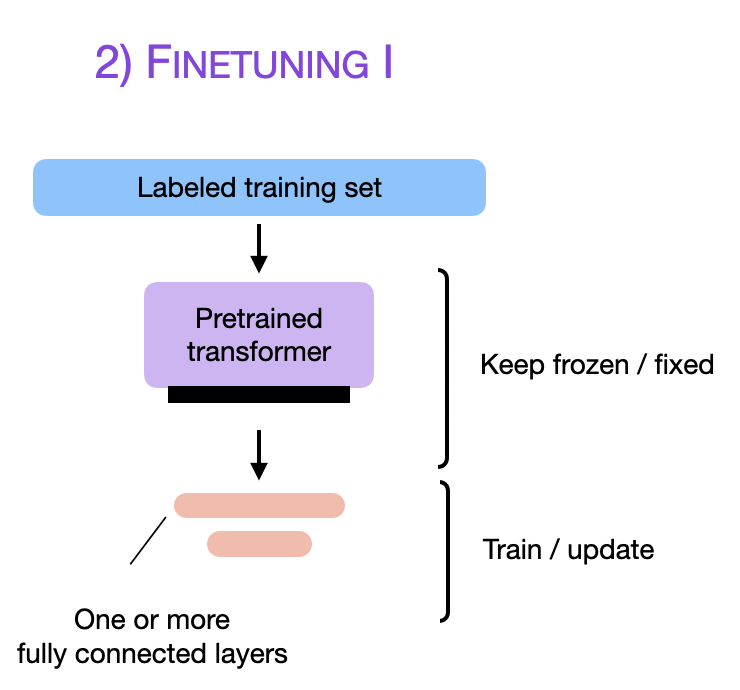

In [1]:
#!pip install transformers

## Check if i have gpu on machone to use.

In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#1. Loading the dataset

## 1.1 Loading the dependancies

In [2]:
import pandas as pd
import numpy as np

In [3]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [4]:
#here we will be coding a feature based , or working on the feature based model and understanding its accuracy with respect to our dataset
# from helper_functions import unzip_data, calculate_results
# unzip_data('/content/train_test.zip')

In [5]:
#Importing the datasets
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
print('Train: ',df_train.shape)
print('Test: ', df_test.shape)

Train:  (888, 8)
Test:  (274, 8)


## 1.2 Inspecting the data

### 1.2.1 The train data 

In [7]:
df_train.head(5)

,sentences,sentences_labels,Subject,Object,relations,labels,filename,relations_id
0,A focus on market quality meant that the [E1]C...,A focus on market quality meant that the [ORG]...,Cboe BZX,US,locatedAt,"['ORG', 'GPE']",article_80_CBOE_boosts_its_incentives.txt,1
1,"""Families are struggling and looking for savin...","""Families are struggling and looking for savin...","Wayne Weber,",Gift of College.,managerOf,"['PERSON', 'ORG']",Article_05.txt,0
2,Prof [E1]Simon Kelly[/E1] at University Colleg...,Prof [PERSON]Simon Kelly[/PERSON] at Universit...,Simon Kelly,Northwell-Hofstra School of Medicine,noRelation,"['PERSON', 'ORG']",article_60_Joint_investment_Ireland_US.txt,3
3,"[E1]Leo McAdams[/E1], divisional manager of fi...","[PERSON]Leo McAdams[/PERSON], divisional manag...",Leo McAdams,Enterprise Ireland,employedBy,"['PERSON', 'ORG']",article_58_Enterprise_Ireland.txt,2
4,"This year, upgrade your typical Valentine’s Da...","This year, upgrade your typical Valentine’s Da...",Angelina Bakery,New York City,locatedAt,"['ORG', 'GPE']",article_72_The_15_best_Valentine_s_Day_gifts.txt,1


In [8]:
df_train['sentences'][0]

'A focus on market quality meant that the [E1]Cboe BZX[/E1] exchange was able to capture 36% of all new ETP launches in the [E2]US[/E2] in 2020'

### 1.2.2 The test data 

In [9]:
df_test.head(5)

,sentences,sentences_labels,Subject,Object,relations,labels,filename,relations_id
0,Mary Silva is the CMO of Riephoff Sawmill and ...,Mary Silva is the CMO of Riephoff Sawmill and ...,Miguel Morel,Arkham’s,employedBy,"['PERSON', 'ORG']",article_222_gsr_market.txt,2
1,MORRISVILLE >> It wasn’t the usual summer for ...,MORRISVILLE >> It wasn’t the usual summer for ...,Margaret Collins,Morrisville State College,employedBy,"['PERSON', 'ORG']",article_173_ccamp.txt,2
2,"""The Anuket project is unique in covering Oper...","""The Anuket project is unique in covering Oper...","Walter Kozlowski,",Telstra.,employedBy,"['PERSON', 'ORG']",article_88_linux_foundation.txt,2
3,"Head of HR at [E2]Alchemy[/E2], [E1]Anne O’Nei...","Head of HR at [ORG]Alchemy[/ORG][PERSON], Anne...",Anne O’Neill,Alchemy,managerOf,"['PERSON', 'ORG']",283_Alchemy scoops_Diversity.txt,0
4,We must give employees every tool to be succes...,We must give employees every tool to be succes...,Pinnacle,Dawn Taylor,employedBy,"['ORG', 'PERSON']",234_Employee Orientation.txt,2


In [10]:
df_test['sentences'][0]

"Mary Silva is the CMO of Riephoff Sawmill and a marketing specialist with a focus on SEO, Web Development and Project Management. Read Mary Silva's full executive it provides alpha for trading and investment or because it helps with risk management, exposing some major fraud,” says [E1]Miguel Morel[/E1], [E2]Arkham’s[/E2] 23 year-old CEO."

## 1.3 Splitting the data

In [11]:
#Creating the train data 
X_train = df_train['sentences']
y_train=df_train['relations_id']

#Creating the test data
X_test = df_test['sentences']
y_test=df_test['relations_id']


In [12]:
import pandas as pd 
from sklearn.model_selection import train_test_split

# Load the training file
df_train = pd.read_csv("train.csv")

# Split the training data into train and validation sets
train_df, val_df = train_test_split(df_train, test_size=0.1, random_state=42)


# Save the validation data to a CSV file
val_df.to_csv("val.csv", index=False)
train_df.to_csv("train.csv", index=False)

##1.4 Inspecting the dataset

In [13]:
# !pip install datasets

In [14]:
from datasets import load_dataset

# Load the dataset
annotated_dataset = load_dataset("csv", data_files={
    "train": "train.csv",
    "validation": "val.csv",
    "test": "test.csv",
})

# Access the train, validation, and test splits
train_dataset = annotated_dataset["train"]
val_dataset = annotated_dataset["validation"]
test_dataset = annotated_dataset["test"] 

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /home/programmer/.cache/huggingface/datasets/csv/default-d5bd3139c4d38a6d/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
train_dataset

Dataset({
    features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id'],
    num_rows: 799
})

In [16]:
val_dataset

Dataset({
    features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id'],
    num_rows: 89
})

In [17]:
test_dataset

Dataset({
    features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id'],
    num_rows: 274
})

# 2. Visualization

# 3. Tokenization

* This is the process of taking the input and breaking it down to token to extract patterns. (puts the words into number the model can understand)

Steps:

* To achieve this we will first take our input and convert it to a list. Given the tokenizer a list of inputs.

In [18]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [19]:
print("Tokenizer input max length:", tokenizer.model_max_length)
print("Tokenizer vocabulary size:", tokenizer.vocab_size)

Tokenizer input max length: 512
Tokenizer vocabulary size: 30522


In [20]:
special_tokens_dict = {'additional_special_tokens': ['[E1]', '[/E1]', '[E2]', '[/E2]']}
tokenizer.add_special_tokens(special_tokens_dict)

4

##3.2 Tokenizing the dataset

In [21]:
def tokenize_text(batch):
  return tokenizer(batch["sentences"], truncation=True, padding=True)


data_tokenized = annotated_dataset.map(tokenize_text, batched=True, batch_size=None)

Map:   0%|          | 0/799 [00:00<?, ? examples/s]

Map:   0%|          | 0/89 [00:00<?, ? examples/s]

Map:   0%|          | 0/274 [00:00<?, ? examples/s]

In [22]:
data_tokenized.set_format("torch", columns=["input_ids", "attention_mask", "relations_id"])

In [23]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# 3. Set Up DataLoaders:
Create DataLoaders to efficiently load and process your dataset during training. DataLoaders allow you to handle batching, shuffling, and other data-related operations. You can use PyTorch's DataLoader class to accomplish this.

In [24]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


class annotated_dataset(Dataset):
  def __init__(self, dataset_dict, partition_key="train"):
    self.partition = dataset_dict[partition_key]

  def __getitem__(self, index):
    return self.partition[index]

  def __len__(self):
    return self.partition.num_rows

In [25]:
train_dataset = annotated_dataset(data_tokenized, partition_key="train")
val_dataset = annotated_dataset(data_tokenized, partition_key="validation")
test_dataset = annotated_dataset(data_tokenized, partition_key="test")

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True, 
    num_workers=4
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    num_workers=4
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    num_workers=4
)

Using **DataLoaders** to handle:

* Batching
* Surfing

# 4. Initializing the DistilBERT

In [26]:
from transformers import AutoModelForSequenceClassification

model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(
    model_name, 
    num_labels=4, 
    output_hidden_states=True
)
model.resize_token_embeddings(len(tokenizer))
model.to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30526, 768)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin

In [27]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30526, 768)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin

## 4.1 Freezing all the layers


To achieve this by setting the requires_grad attribute of the model's parameters all to false

In [29]:
# Freeze all the parameters
for param in model.parameters():
    param.requires_grad = False


## 4.2 Unfreezing the last two layers. 


To achieve this we start by checking the last two layers of the model.

In [30]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30526, 768)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin

The **last two layers of the DistilBERT model** is the:
* pre-classsifier
* classifier


To unfreeze the parameters of the last two layers you use the requires_grad attribute and set the paramters to true.


In [31]:
# Unfreeze the last two layers for fine-tuning
for param in model.pre_classifier.parameters():
    param.requires_grad = True

for param in model.classifier.parameters():
    param.requires_grad = True

# for param in model.distilbert.transformer.layer[-2:].parameters():
#     param.requires_grad = True

# 5. Finetuning

Fine-tuning: In the fine-tuning step, you freeze most of the pre-trained model's layers and only allow the last few layers to be trainable. This allows you to adapt the LLM to your specific task while leveraging the pre-trained weights. 

LIGHTNINGMODULE

A LightningModule organizes your PyTorch code into 6 sections. The convinience methods used are :

* Initialization (__init__ and setup()) - Define initilization here 

* foward() - Defines how data will flow through your model from input to output. 


* Train Loop (training_step()) - method is used to define the complete training step for your model.Components are:
  1. Foward Pass
  2. Loss Calculation
  3. Backward Pass(Gradient Calculation)
  4. Parameter Update 

* Validation Loop (validation_step()) - It encompasses all the necessary computations and operations that are performed during the validation process to evaluate the model's performance on a validation datase
  1. Foward Pass
  2. Loss Calculation
  3. Metric Calculation:

* Test Loop (test_step())
  1. Foward Pass
  2. Loss Calculation
  3. Metric Calculation

* Prediction Loop (predict_step())

* Optimizers and LR Schedulers (configure_optimizers())

This is used to run the foward pass of a model which happens, which is the computation that happens when data is passed from input to output. 

In [32]:
# !pip install lightning

In [33]:
import lightning as L
import torch
import torchmetrics


class CustomLightningModule(L.LightningModule):
  def __init__(self, model, learning_rate=5e-5):
    super().__init__()

    self.learning_rate = learning_rate
    self.model = model

    self.val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=4)
    self.test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=4)

  def forward(self, input_ids, attention_mask, labels):
    return self.model(input_ids, attention_mask=attention_mask, labels=labels)
    
  def training_step(self, batch, batch_idx):
    outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                    labels=batch["relations_id"])        
    self.log("train_loss", outputs["loss"])
    return outputs["loss"]  # this is passed to the optimizer for training

  def validation_step(self, batch, batch_idx):
    outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                    labels=batch["relations_id"])        
    self.log("val_loss", outputs["loss"], prog_bar=True)
    
    logits = outputs["logits"]
    predicted_labels = torch.argmax(logits, 1)
    self.val_acc(predicted_labels, batch["relations_id"])
    self.log("val_acc", self.val_acc, prog_bar=True)
      
  def test_step(self, batch, batch_idx):
    outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                    labels=batch["relations_id"])        
    
    logits = outputs["logits"]
    predicted_labels = torch.argmax(logits, 1)
    self.test_acc(predicted_labels, batch["relations_id"])
    self.log("accuracy", self.test_acc, prog_bar=True)

  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
    return optimizer
  

lightning_model = CustomLightningModule(model)

In [35]:
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import CSVLogger


callbacks = [
    ModelCheckpoint(
        save_top_k=1, mode="max", monitor="val_acc", verbose=True
    )  # save top 1 model
]
logger = CSVLogger(save_dir="logs/", name="my-model")

In [36]:
import lightning as L

trainer = L.Trainer(
  max_epochs=10,
  callbacks=callbacks,
  accelerator='cuda',
  precision="16-mixed",
  devices=[0],
  logger=logger,
  log_every_n_steps=10,
  
)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [37]:
import time
start = time.time()

trainer.fit(model=lightning_model,
            train_dataloaders=train_loader,
            val_dataloaders=val_loader
           )

end = time.time()
elapsed = end - start
print(f"Time elapsed {elapsed/60:.2f} min")

You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type                                | Params
-----------------------------------------------------------------
0 | model    | DistilBertForSequenceClassification | 67.0 M
1 | val_acc  | MulticlassAccuracy                  | 0     
2 | test_acc | MulticlassAccuracy                  | 0     
-----------------------------------------------------------------
593 K     Trainable params
66.4 M    Non-trainable params
67.0 M    Total params
267.838   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 13: 'val_acc' reached 0.30337 (best 0.30337), saving model to 'logs/my-model/version_0/checkpoints/epoch=0-step=13.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 26: 'val_acc' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 39: 'val_acc' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 52: 'val_acc' reached 0.41573 (best 0.41573), saving model to 'logs/my-model/version_0/checkpoints/epoch=3-step=52.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 65: 'val_acc' reached 0.43820 (best 0.43820), saving model to 'logs/my-model/version_0/checkpoints/epoch=4-step=65.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 78: 'val_acc' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 91: 'val_acc' reached 0.44944 (best 0.44944), saving model to 'logs/my-model/version_0/checkpoints/epoch=6-step=91.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 104: 'val_acc' reached 0.47191 (best 0.47191), saving model to 'logs/my-model/version_0/checkpoints/epoch=7-step=104.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 117: 'val_acc' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 9, global step 130: 'val_acc' was not in top 1
`Trainer.fit` stopped: `max_epochs=10` reached.


Time elapsed 0.34 min


In [38]:
trainer.test(lightning_model, dataloaders=train_loader, ckpt_path="best")

Restoring states from the checkpoint path at logs/my-model/version_0/checkpoints/epoch=7-step=104.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logs/my-model/version_0/checkpoints/epoch=7-step=104.ckpt
/home/programmer/Documents/orcawise/allendevelopment/model_3/spacy_custom_re_env/lib/python3.8/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:486: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.5331664681434631     │
└───────────────────────────┴───────────────────────────┘

[{'accuracy': 0.5331664681434631}]

In [39]:
trainer.test(lightning_model, dataloaders=val_loader, ckpt_path="best")

Restoring states from the checkpoint path at logs/my-model/version_0/checkpoints/epoch=7-step=104.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logs/my-model/version_0/checkpoints/epoch=7-step=104.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.47191011905670166    │
└───────────────────────────┴───────────────────────────┘

[{'accuracy': 0.47191011905670166}]

In [40]:
trainer.test(lightning_model, dataloaders=test_loader, ckpt_path="best")

Restoring states from the checkpoint path at logs/my-model/version_0/checkpoints/epoch=7-step=104.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logs/my-model/version_0/checkpoints/epoch=7-step=104.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.47445255517959595    │
└───────────────────────────┴───────────────────────────┘

[{'accuracy': 0.47445255517959595}]